In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_desc = pd.read_excel('../data/multi_asset_etf_data.xlsx', sheet_name='descriptions')
df_prices = pd.read_excel('../data/multi_asset_etf_data.xlsx', sheet_name='prices')
df_returns = pd.read_excel('../data/multi_asset_etf_data.xlsx', sheet_name='total returns').drop(columns=['Date'])
df_excess_returns = pd.read_excel('../data/multi_asset_etf_data.xlsx', sheet_name='excess returns').drop(columns=['Date'])

In [3]:
df_excess_returns.head(2)

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
0,0.006527,0.041620,-0.000527,0.035408,0.014264,-0.002174,0.045113,0.040056,0.002493,0.034647,0.007118
1,0.008255,0.026409,0.062723,-0.024055,0.000251,-0.001719,-0.011107,0.016495,0.005348,-0.000052,0.011730


In [4]:
# 2.1 Summary Statistics
summary_statistics = pd.DataFrame(index=df_excess_returns.columns)

summary_statistics['mean'] = df_excess_returns.mean() * 12
summary_statistics['volatility'] = df_excess_returns.std() * (12 ** 0.5)
summary_statistics['sharpe_ratio'] = summary_statistics['mean'] / summary_statistics['volatility']

max_sharpe = summary_statistics['sharpe_ratio'].max()
min_sharpe = summary_statistics['sharpe_ratio'].min()

print(tabulate(summary_statistics, headers=summary_statistics.columns, tablefmt="heavy_grid"))
print(f"ETF with Max Sharpe Ratio: {summary_statistics[summary_statistics['sharpe_ratio'] == max_sharpe]['sharpe_ratio']}")
print(f"ETF with Min Sharpe Ratio: {summary_statistics[summary_statistics['sharpe_ratio'] == min_sharpe]['sharpe_ratio']}")

┏━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃     ┃       mean ┃   volatility ┃   sharpe_ratio ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ BWX ┃ -0.0118883 ┃    0.0816711 ┃     -0.145563  ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ DBC ┃ -0.0090856 ┃    0.168455  ┃     -0.0539348 ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ EEM ┃  0.0269602 ┃    0.17994   ┃      0.149829  ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ EFA ┃  0.0550373 ┃    0.152203  ┃      0.361605  ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ HYG ┃  0.0373563 ┃    0.0772887 ┃      0.483335  ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ IEF ┃  0.0139387 ┃    0.0631966 ┃      0.220561  ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ IYR ┃  0.0779116 ┃    0.169585  ┃      0.459426  ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ PSP ┃  0.0928506 ┃    0.215238  ┃      0.431386  ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━

Max Correlation pair is ('EFA', 'PSP')
Min Correlation pair is ('DBC', 'IEF')
┏━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃     ┃       mean ┃   volatility ┃   sharpe_ratio ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ BWX ┃ -0.0118883 ┃    0.0816711 ┃      -0.145563 ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ IEF ┃  0.0139387 ┃    0.0631966 ┃       0.220561 ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ TIP ┃  0.0168442 ┃    0.0512576 ┃       0.328618 ┃
┗━━━━━┻━━━━━━━━━━━━┻━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━┛
TIPS have outperformed domestic bonds and foreign bonds in terms of mean, volatility, and Sharpe.


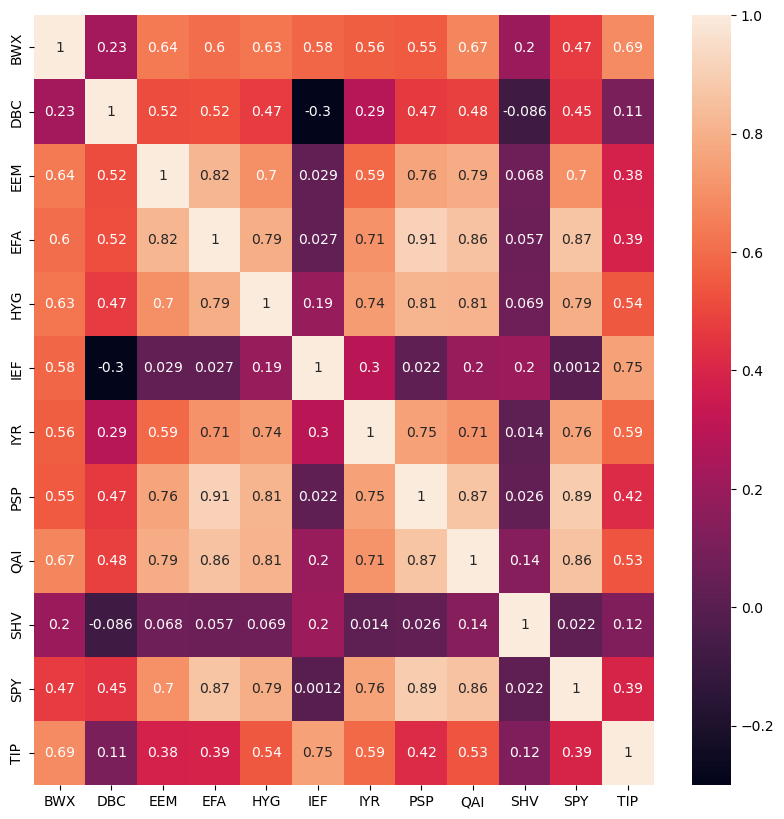

In [5]:
#2.2 Descriptive Analysis
fig, ax = plt.subplots(figsize=(10,10))
correlation_matrix = df_returns.corr()
sns.heatmap(correlation_matrix, 
        xticklabels=correlation_matrix.columns,
        yticklabels=correlation_matrix.columns, annot=True)

corrs = correlation_matrix.unstack().sort_values().to_frame('Corr')
corrs = corrs[corrs['Corr']!=1]
corrs_max = corrs.index[-1]
corrs_min = corrs.index[0]

print(f'Max Correlation pair is {corrs_max}')
print(f'Min Correlation pair is {corrs_min}')

# TIPS
tips = summary_statistics[summary_statistics.index.isin(['TIP', 'BWX', 'IEF'])]
print(tabulate(tips, headers=tips.columns, tablefmt="heavy_grid"))
print('TIPS have outperformed domestic bonds and foreign bonds in terms of mean, volatility, and Sharpe.')

In [6]:
# 2.3 The MV Frontier
#ωt ≡ (1/(1′Σ^−1μ))Σ^−1μ
# 2.3.1
mu = df_excess_returns.mean()*12
cov_matrix = df_excess_returns.cov()*12
inv_cov_matrix = np.linalg.inv(cov_matrix)
ones = np.ones(len(mu))
scaling_factor = 1/(ones.T @ inv_cov_matrix @ mu)
tangency = scaling_factor * (inv_cov_matrix @ mu)
tangency_df = pd.DataFrame({
    'Asset': df_excess_returns.columns,  
    'weights': tangency
})
print(tabulate(tangency_df, headers=tangency_df.columns, tablefmt="heavy_grid"))

┏━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃    ┃ Asset   ┃   weights ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━┫
┃  0 ┃ BWX     ┃  2.73025  ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━┫
┃  1 ┃ DBC     ┃ -0.111241 ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━┫
┃  2 ┃ EEM     ┃ -0.615698 ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━┫
┃  3 ┃ EFA     ┃  0.530692 ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━┫
┃  4 ┃ HYG     ┃ -0.832578 ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━┫
┃  5 ┃ IEF     ┃ -4.68248  ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━┫
┃  6 ┃ IYR     ┃  0.877108 ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━┫
┃  7 ┃ PSP     ┃  0.277002 ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━┫
┃  8 ┃ QAI     ┃  7.22059  ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━┫
┃  9 ┃ SPY     ┃ -4.90409  ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━┫
┃ 10 ┃ TIP     ┃  0.510436 ┃
┗━━━━┻━━━━━━━━━┻━━━━━━━━━━━┛


In [7]:
# 2.3.2
summary_statistics['sharpe_ranking'] = summary_statistics['sharpe_ratio'].rank(ascending=False)
tangency_df['tangency_ranking'] = tangency_df['weights'].rank(ascending=False)
ranking_df = pd.DataFrame({
    'Asset': summary_statistics.index,  
    'Sharpe_Ranking': summary_statistics['sharpe_ranking'],
    'Tangency_Ranking': tangency_df['tangency_ranking'].values 
})
print(tabulate(ranking_df, headers='keys', tablefmt='heavy_grid', showindex=False))
print("EFA, EEM, TIPand IYR show a relatively close alignment between Sharpe and Tangency rankings.")
print("Most assets have significantly different rankings between Sharpe and Tangency.")

┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Asset   ┃   Sharpe_Ranking ┃   Tangency_Ranking ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ BWX     ┃               11 ┃                  2 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ DBC     ┃               10 ┃                  7 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ EEM     ┃                9 ┃                  8 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ EFA     ┃                5 ┃                  4 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ HYG     ┃                2 ┃                  9 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ IEF     ┃                8 ┃                 10 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ IYR     ┃                3 ┃                  3 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ PSP     ┃                4 ┃                  6 ┃
┣━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ QAI     ┃ 

In [8]:
# 2.3.3
mean_tangency = tangency.T @ mu
vol_tangency = np.sqrt(tangency.T @ cov_matrix @ tangency)
sharpe_ratio_tangency = (mean_tangency) / vol_tangency

results = [
    ["Mean Return of Tangency Portfolio", mean_tangency],
    ["Volatility of Tangency Portfolio", vol_tangency],
    ["Sharpe Ratio of Tangency Portfolio", sharpe_ratio_tangency]
]
print(tabulate(results, headers=["", "Value"], tablefmt="heavy_grid", floatfmt=".4f"))

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃                                    ┃   Value ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━┫
┃ Mean Return of Tangency Portfolio  ┃ -0.5273 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━┫
┃ Volatility of Tangency Portfolio   ┃  0.3285 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━┫
┃ Sharpe Ratio of Tangency Portfolio ┃ -1.6050 ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━┛


In [9]:
# 2.4 TIPS
# 2.4.1 Exclude TIPS
df_excess_returns_excluding_TIPS = df_excess_returns.drop(columns=['TIP'])  
mu_excluding_TIPS = df_excess_returns_excluding_TIPS.mean() * 12 
cov_matrix_excluding_TIPS = df_excess_returns_excluding_TIPS.cov() * 12  
inv_cov_matrix_excluding_TIPS = np.linalg.inv(cov_matrix_excluding_TIPS)
tangency_numerator_excluding_TIPS = inv_cov_matrix_excluding_TIPS @ mu_excluding_TIPS
ones = np.ones(len(mu_excluding_TIPS))
scaling_factor_excluding_TIPS = 1/(ones.T @ inv_cov_matrix_excluding_TIPS @ mu_excluding_TIPS)
tangency_excluding_TIPS = scaling_factor_excluding_TIPS * (inv_cov_matrix_excluding_TIPS @ mu_excluding_TIPS)
tangency_excluding_TIPS_df = pd.DataFrame({
    'Asset': df_excess_returns_excluding_TIPS.columns,  
    'weights': tangency_excluding_TIPS
})

mean_tangency_excluding_TIPS = tangency_excluding_TIPS.T @ mu_excluding_TIPS
vol_tangency_excluding_TIPS = np.sqrt(tangency_excluding_TIPS.T @ cov_matrix_excluding_TIPS @ tangency_excluding_TIPS)
sharpe_ratio_tangency_excluding_TIPS = (mean_tangency_excluding_TIPS) / vol_tangency_excluding_TIPS

# 2.4.2 Adjust TIPS
mu_adjusted_TIPS = mu.copy()
mu_adjusted_TIPS['TIP'] += 0.0012 # Assuming Annual Increase 
ones = np.ones(len(mu_adjusted_TIPS))
scaling_factor_adjusted_TIPS = 1/(ones.T @ inv_cov_matrix @ mu_adjusted_TIPS)
tangency_adjusted_TIPS = scaling_factor_adjusted_TIPS * (inv_cov_matrix @ mu_adjusted_TIPS)
mean_tangency_adjusted_TIPS = tangency_adjusted_TIPS.T @ mu_adjusted_TIPS
vol_tangency_adjusted_TIPS = np.sqrt(tangency_adjusted_TIPS.T @ cov_matrix @ tangency_adjusted_TIPS)
sharpe_ratio_tangency_adjusted_TIPS = (mean_tangency_adjusted_TIPS) / vol_tangency_adjusted_TIPS

# Compiled Results
results = [
    ["Original (with TIPS)", mean_tangency, vol_tangency, sharpe_ratio_tangency],
    ["Excluding TIPS", mean_tangency_excluding_TIPS, vol_tangency_excluding_TIPS, sharpe_ratio_tangency_excluding_TIPS],
    ["Adjusted TIPS", mean_tangency_adjusted_TIPS, vol_tangency_adjusted_TIPS, sharpe_ratio_tangency_adjusted_TIPS]
]

print(tabulate(results, headers=["Portfolio", "Mean Return", "Volatility", "Sharpe Ratio"], tablefmt="heavy_grid", floatfmt=".4f"))

print('Dropping TIPS does not have much of an effect on performance but does increase Sharpe slightly.')
print('Adjusting TIPS also does not have much of an effect.')
print('TIPS seem to not expand the investment opportunity set.\nHarvard may need to rethink considering them as a seperate asset.')

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Portfolio            ┃   Mean Return ┃   Volatility ┃   Sharpe Ratio ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ Original (with TIPS) ┃       -0.5273 ┃       0.3285 ┃        -1.6050 ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ Excluding TIPS       ┃       -0.5808 ┃       0.3621 ┃        -1.6039 ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ Adjusted TIPS        ┃       -0.5695 ┃       0.3551 ┃        -1.6039 ┃
┗━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━┛
Dropping TIPS does not have much of an effect on performance but does increase Sharpe slightly.
Adjusting TIPS also does not have much of an effect.
TIPS seem to not expand the investment opportunity set.
Harvard may need to rethink considering them as a seperate asset.


In [10]:
# 3
target_mean = .01
allocations = pd.DataFrame(index = df_excess_returns.columns, columns = ['tangency', 'EW', 'RP', 'REG'])

mu = df_excess_returns.mean()
cov_matrix = df_excess_returns.cov()
inv_cov_matrix = np.linalg.inv(cov_matrix)
ones = np.ones(len(mu))
scaling_factor = 1/(ones.T @ inv_cov_matrix @ mu)
tangency = scaling_factor * (inv_cov_matrix @ mu)
allocations['tangency'] = tangency
# 3.1
allocations['EW'] = 1/len(df_excess_returns.columns)
# 3.2
allocations['RP'] = 1/df_excess_returns.var()
# 3.3
diag_cov = np.diag(np.diag(cov_matrix))
reg_cov = (cov_matrix + diag_cov)/2
inv_reg_cov = np.linalg.inv(reg_cov)
scaling_factor_reg = 1/(ones.T@inv_reg_cov@ mu)
reg_weights = scaling_factor_reg * (inv_reg_cov@ mu)
allocations['REG'] = reg_weights
allocations *= target_mean / (df_excess_returns.mean()@allocations)
print(tabulate(allocations, headers='keys', tablefmt='heavy_grid', floatfmt=".4f"))

┏━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃     ┃   tangency ┃     EW ┃     RP ┃     REG ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━┫
┃ BWX ┃    -0.6214 ┃ 0.2716 ┃ 0.5229 ┃ -0.6754 ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━┫
┃ DBC ┃     0.0253 ┃ 0.2716 ┃ 0.1229 ┃ -0.1362 ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━┫
┃ EEM ┃     0.1401 ┃ 0.2716 ┃ 0.1077 ┃ -0.0662 ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━┫
┃ EFA ┃    -0.1208 ┃ 0.2716 ┃ 0.1506 ┃  0.0373 ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━┫
┃ HYG ┃     0.1895 ┃ 0.2716 ┃ 0.5839 ┃  0.3168 ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━┫
┃ IEF ┃     1.0657 ┃ 0.2716 ┃ 0.8733 ┃  0.3935 ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━┫
┃ IYR ┃    -0.1996 ┃ 0.2716 ┃ 0.1213 ┃  0.0803 ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━┫
┃ PSP ┃    -0.0630 ┃ 0.2716 ┃ 0.0753 ┃  0.0495 ┃
┣━━━━━╋━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━┫
┃ QAI ┃    -1.6433 ┃ 0.2716 ┃ 1.4522 ┃ -0.1565 ┃
┣━━━━━╋━━━━━━━━━━━━╋

In [11]:
# 3.4 Comparision
performance = pd.DataFrame(columns=['Mean Return', 'Volatility', 'Sharpe Ratio'], index=['tangency', 'EW', 'RP', 'REG'])

for portfolio in ['tangency', 'EW', 'RP', 'REG']:
    weights = allocations[portfolio].values
    mean_return = mu.T @ weights *12
    volatility = np.sqrt(weights.T @ cov_matrix @ weights) * (12**0.5)
    sharpe_ratio = (mean_return) / volatility  
    performance.loc[portfolio, 'Mean Return'] = mean_return
    performance.loc[portfolio, 'Volatility'] = volatility
    performance.loc[portfolio, 'Sharpe Ratio'] = sharpe_ratio

print(tabulate(performance, headers='keys', tablefmt='heavy_grid', floatfmt=".4f"))
print('The tangency portfolio has a very high Sharpe ratio as well as the Regularized portfolio.\nThe tangency portfolio does have the highest Sharpe at 1.605.')

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃          ┃   Mean Return ┃   Volatility ┃   Sharpe Ratio ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ tangency ┃        0.1200 ┃       0.0748 ┃         1.6050 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ EW       ┃        0.1200 ┃       0.2915 ┃         0.4116 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ RP       ┃        0.1200 ┃       0.3095 ┃         0.3877 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━┫
┃ REG      ┃        0.1200 ┃       0.1026 ┃         1.1695 ┃
┗━━━━━━━━━━┻━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━┛
The tangency portfolio has a very high Sharpe ratio as well as the Regularized portfolio.
The tangency portfolio does have the highest Sharpe at 1.605.
